 # **1. Loading Dataset**

Pada tahap ini dilakukan proses membaca dan menampilkan dataset yang akan digunakan untuk
membangun model


In [3]:
import pandas as pd

# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/drive/MyDrive/PRAKTIKUM ML/praktikum 11/Data/Iris (1).csv')

# cetak header data (5 baris data) dari file
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Mengimpor library pandas, yaitu library Python yang digunakan untuk membaca, memproses, dan
menganalisis data dalam bentuk tabel (DataFrame). Lalu, menampilkan 5 baris pertama dengan .head()

# • Menampilkan informasi detail dengan df.info()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Perintah ini memberikan ringkasan lengkap dari dataset, seperti:

➢ Jumlah baris dan kolom

➢ Nama kolom beserta tipe datanya (object, int64, float64)

➢ Jumlah nilai yang tidak kosong (Non-Null Count)

➢ Total penggunaan memori datas

# • Cek Missing Value dan Data Duplikat

In [5]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


# • Menampilkan statistika deskriptif dari dataset

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# • Cek nilai pada kolom Species
Perintah df["Species"].unique() digunakan untuk menampilkan daftar nilai unik pada kolom
Species. Hasilnya menunjukkan bahwa dataset Iris memiliki tiga jenis bunga, yaitu Iris-setosa, Irisversicolor, dan Iris-virginica.

In [7]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# • Menghitung jumlah pada kolom Species
Selanjutnya, perintah df["Species"].value_counts() digunakan untuk menghitung jumlah data
pada setiap kelas. Hasil yang ditampilkan menunjukkan bahwa masing-masing spesies memiliki
50 data, sehingga total keseluruhan adalah 150 data.

In [8]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Dari hasil ini dapat disimpulkan bahwa dataset Iris bersifat seimbang (balanced) karena setiap kelas
memiliki jumlah data yang sama.

# **2. Pemilihan Fitur**
Pada tahap ini dilakukan pemisahan antara fitur (X) dan label (y)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

# Fitur untuk clustering
x = df.drop(["Species", "SpeciesEncoded"], axis=1)


• Pemilihan Fitur: Fitur (X) yang digunakan untuk clustering adalah kolom Id, SepalLengthCm,
SepalWidthCm, PetalLengthCm, dan PetalWidthCm. Kolom Species dan SpeciesEncoded (yang
merupakan hasil Label Encoding dari Species untuk keperluan perbandingan) dibuang dari data
fitur yang digunakan untuk clustering.

• Label Encoding: Meskipun K-Means adalah unsupervised, kolom Species di-encode menjadi
SpeciesEncoded (0, 1, 2) untuk tujuan evaluasi dan perbandingan hasil clustering dengan label asli
di tahap akhir.

In [17]:
# Pilih fitur numerik untuk clustering
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# Metode Elbow
from sklearn.cluster import KMeans

inertia_list = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_list.append(km.inertia_)


 # **3. Menentukan Jumlah Cluster (K) dengan Elbow Method**
Jumlah cluster optimal K ditentukan menggunakan Elbow Method, yang memplot nilai Inertia terhadap
jumlah cluster.


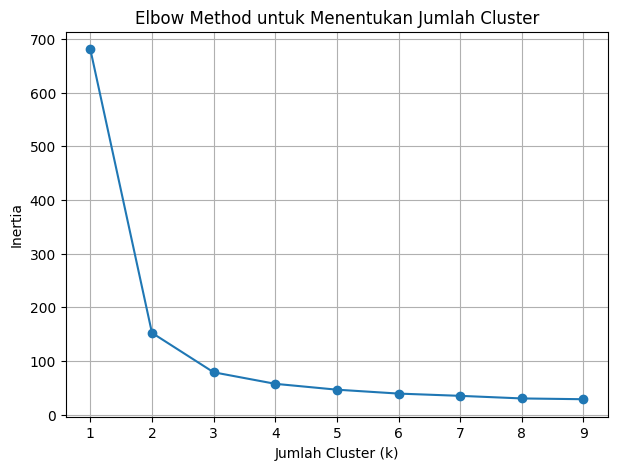

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

Inertia merupakan ukuran seberapa baik data dikelompokkan, dihitung sebagai jumlah kuadrat jarak
setiap titik data ke centroid cluster-nya. Nilai Inertia akan menurun seiring bertambahnya K. Sedangkan
Elbow Poin adalah titik pada grafik di mana penurunan Inertia mulai melambat secara signifikan,
menyerupai siku. Titik ini menunjukkan jumlah cluster yang optimal.




Dari plot Elbow Method yang dihasilkan, terlihat jelas titik siku (elbow point) berada pada K= 3. Hal ini
konsisten dengan jumlah spesies bunga Iris yang sebenarnya (3 spesies).

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,     # sesuaikan jumlah cluster
    random_state=42
)

df["cluster"] = kmeans.fit_predict(X)
print("cluster ditemukan:", df["cluster"].unique())


cluster ditemukan: [1 0 2]


# **4. Membangun Model K-Means**

In [21]:
from sklearn.cluster import KMeans
Kmeans = KMeans(
    n_clusters=3,
    init="K-means++",
    random_state=42
)

df["cluster"] = kmeans.fit_predict(X)
print("cluster ditemukan:", df["cluster"].unique())


cluster ditemukan: [1 0 2]


• Inisialisasi Model: Model diinisialisasi dengan n_clusters=3 (sesuai hasil Elbow Method) dan
init='k-means++' (untuk pemilihan centroid awal yang lebih cerdas).

• Pelatihan dan Prediksi: Model dilatih menggunakan data fitur (X) dan hasil clustering (cluster
prediksi) disimpan dalam kolom baru, df["Cluster"].

• Hasil Cluster: Model berhasil menemukan 3 cluster (berlabel 0, 1, dan 2).

 # **5. Evaluasi Kualitas Clustering**

In [23]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["cluster"])
print("\n----- SILHOUETTE SCORE -----")
print("Silhouette Score:", sil_score)



----- SILHOUETTE SCORE -----
Silhouette Score: 0.5509643746707443


Kualitas hasil clustering diukur menggunakan Silhouette Score yang merupakan metrik untuk mengukur
seberapa mirip suatu objek dengan cluster-nya sendiri (kohesi) dibandingkan dengan cluster lain
(separasi).

• Nilai berkisar antara -1 sampai +1.

• Nilai mendekati +1 menunjukkan objek telah dikelompokkan dengan baik.

• Nilai mendekati 0 menunjukkan objek berada di antara dua cluster.

• Nilai mendekati -1 menunjukkan objek salah cluster.
Silhouette Score yang dihasilkan adalah 0.58167, menunjukkan bahwa cluster yang terbentuk memiliki
separasi yang cukup baik.


# **6. Confusion Matrix (Perbandingan dengan Label Asli)**
Meskipun K-Means tidak menggunakan label asli saat pelatihan, Confusion Matrix dapat digunakan untuk
membandingkan hasil cluster (label prediksi) dengan label SpeciesEncoded (label asli/kebenaran).

In [25]:
cm = confusion_matrix(df["SpeciesEncoded"], df["cluster"])
print(cm)
print("\n----- CLASSIFICATION REPORT -----")
print(classification_report(df["SpeciesEncoded"], df["cluster"]))


[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]

----- CLASSIFICATION REPORT -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150



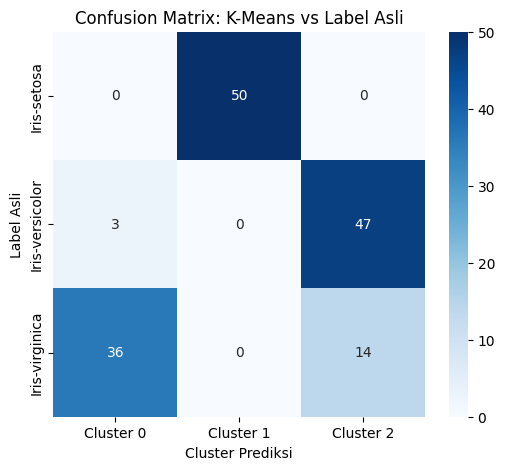

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
            yticklabels=le.classes_)
plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

• Matriks ini menunjukkan bahwa clustering tidak secara langsung memetakan cluster (0, 1, 2) ke
label asli (Iris-setosa, Iris-versicolor, Iris-virginica) dengan urutan yang sempurna.

• Misalnya, Iris-setosa (label asli 0) sebagian besar diprediksi sebagai Cluster 2 (49 data), bukan
Cluster 0 (1 data).

• Ini adalah hal yang wajar dalam unsupervised learning karena K-Means hanya bertujuan
mengelompokkan data berdasarkan kedekatan fitur, bukan mereplikasi label yang sudah ada.


# **7. 2D dan 3D Visualisasi Hasil Model K-Means**

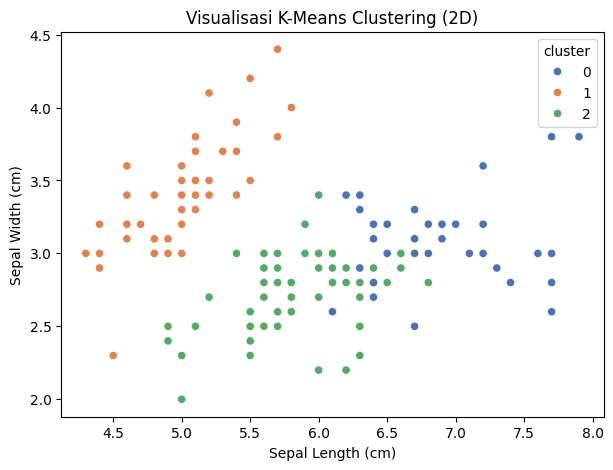

In [28]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["cluster"],   # <-- ini yang benar
    palette="deep"
)
plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

2D Plot (Sepal Length vs Sepal Width) ini menunjukkan bahwa cluster yang terbentuk cukup terpisah satu
sama lain, terutama satu cluster yang jauh terpisah dari dua cluster lainnya. Hal ini mengindikasikan
bahwa fitur kelopak bunga (Sepal) efektif memisahkan setidaknya satu jenis Iris

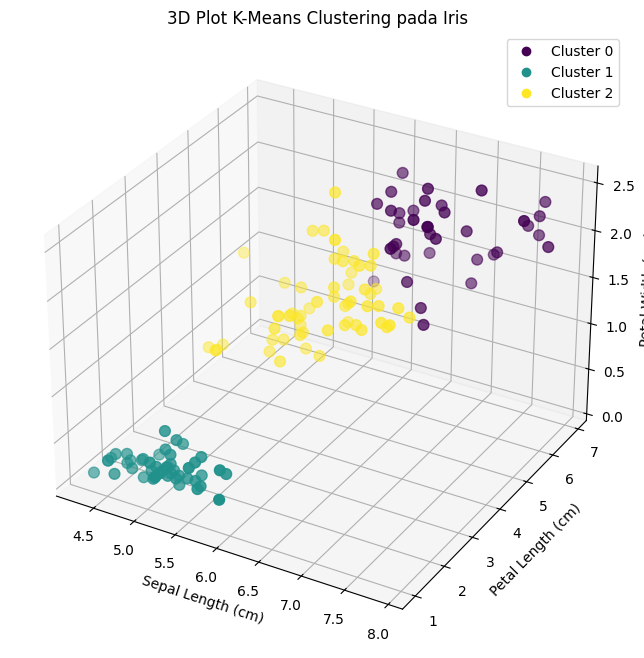

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["cluster"],
    s=60
)

ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

3D Plot (Sepal Length, Petal Length, Petal Width) merupakan plot tiga dimensi memberikan pandangan
yang lebih komprehensif, menunjukkan bagaimana ketiga cluster (biru, hijau, merah) terpisah dengan
baik dalam ruang 3D. Ini memvisualisasikan mengapa Silhouette Score bernilai cukup baik—data yang
memiliki fitur serupa dikelompokkan bersama.